<br>

# <center> Neural Networks - *Binary Class*


<br>

---

<br>


<br>

## Import Libraries

In [23]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## Dataset Overview

In [24]:
# loading dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

# Creating dataframe
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])

# extracting targets
target = breast_cancer['target']

# extracting targets names
targetNames = breast_cancer['target_names']

In [25]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<br>

## Preprocessing

**Train Test Split**

In [26]:
# Train Test Split
X = df.values
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

**Scaling Data**

In [27]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<br>

# 01. Model Design

In [28]:
# importing libraries for model design
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [29]:
# checking the shape of the training data
X_train.shape

(483, 30)

## Creating Model

In [30]:
# model creatiion

model = Sequential()

model.add( Dense(units=30, activation='relu') )
model.add( Dropout(0.5) )

model.add( Dense(units=16, activation='relu') )
model.add( Dropout(0.2) )

model.add( Dense(units=8, activation='relu') )
model.add( Dropout(0.25) )

model.add( Dense(units=4, activation='relu') )
model.add( Dropout(0.5) )

model.add( Dense(units=2, activation='relu') )
model.add( Dropout(0.5) )

model.add( Dense(units=1, activation = 'sigmoid') )


In [31]:
# Compiling the model
model.compile( loss='binary_crossentropy', metrics = ['accuracy'], optimizer='adam' )

<br>

# 02. Model Training

## Defining Early-Stopping-Callback

In [32]:
# importing early stopping callbacks from keras
from keras.callbacks import EarlyStopping

# defining early stopping
early_stop = EarlyStopping( 
    monitor = 'val_loss', 
    mode = 'min', 
    min_delta = 0.001, # minimium amount of change to count as an improvement
    verbose = 1, 
    patience = 20,
    restore_best_weights = True, 
  )

## Training Model

In [33]:
# model training
model.fit(
    x = X_train,
    y = y_train,
    batch_size = 256,
    epochs = 500,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [early_stop]
)


Epoch 1/500
2/2 [==============================] - 1s 210ms/step - loss: 0.6959 - accuracy: 0.5093 - val_loss: 0.6929 - val_accuracy: 0.6163
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 0.6943 - accuracy: 0.6211 - val_loss: 0.6927 - val_accuracy: 0.6163
Epoch 3/500
2/2 [==============================] - 0s 28ms/step - loss: 0.6915 - accuracy: 0.6211 - val_loss: 0.6925 - val_accuracy: 0.6163
Epoch 4/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6919 - accuracy: 0.6066 - val_loss: 0.6922 - val_accuracy: 0.6163
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6885 - accuracy: 0.6356 - val_loss: 0.6920 - val_accuracy: 0.6163
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6901 - accuracy: 0.6315 - val_loss: 0.6918 - val_accuracy: 0.6163
Epoch 7/500
2/2 [==============================] - 0s 37ms/step - loss: 0.6895 - accuracy: 0.6356 - val_loss: 0.6916 - val_accuracy: 0.6163
Epoch 8/500
2/2 [==

<br>

# 03. Model Evaluaiton

## a. Vusalizing Loss analysis

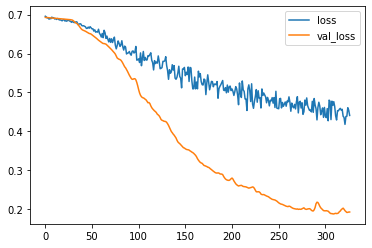

In [34]:
# Loss analysis
model_loss = pd.DataFrame( model.history.history )
model_loss[['loss', 'val_loss']].plot()

<br>

## b. Classification Report and Confusion Matrix

In [35]:
# prediction on test set
predictions = model.predict(X_test)

# mapping the prediction to 0 and 1
predictions = (predictions > 0.5)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# classification report
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.98      0.98      0.98        53

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



In [38]:
# confusion matrix
print( confusion_matrix(y_test, predictions) )

[[32  1]
 [ 1 52]]


## Prediction on New Data

**a. Creating data**

In [39]:
# defining data position
pos = 155

# collecting data from dataframe - df
new_data = df.iloc[pos]

# reshaping the data
new_data = new_data.values.reshape(-1, 30)

# scaling the data using scaler()
new_data = scaler.transform( new_data )

# extracting true result
true_result = target[pos]

<br>

**b. Predicting Class for Created Data**

In [40]:
# predicting result for new_data
predicted_result = model.predict(new_data)

# applying threshold 0.5
predicted_result = 0 if predicted_result[0][0] < 0.5 else 1

<br>

**C. Extracting Class name**

In [41]:
# extracting predicted class name
predicted_class_name = targetNames[predicted_result]

print(f"\n The predicted class is : '{predicted_class_name}'")

# extracting actual class name
true_class_name = targetNames[true_result]

print(f"\n The actual class is : '{true_class_name}'")


 The predicted class is : 'benign'

 The actual class is : 'benign'


<br>

# a. Save the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# save model
model.save( path )
```



<br>

# b. Load the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# loading saved models
from tensorflow.keras.models import load_model
model = load_model( path )
```

